In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Data Understanding, Preparation and EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
#as  you can see there are ?  values in some column  replace them by nan
df=df.replace('?', np.nan)

In [6]:
#lets count nan values in each  column
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

In [7]:
for col in df.columns:
    print(df[col].value_counts())

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64
88785891     40
43140906     28
2319

Name: max_glu_serum, dtype: int64
None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64
No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64
No        101743
Steady        23
Name: tolbutamide, dtype: int64
No        94438
Steady     6976
Up          234
Down        118
N

In [8]:
df.drop('weight', axis=1, inplace=True)

In [9]:
#replace nan with either  higher count or unknown
df['race']=df['race'].fillna('Caucasian')
df['payer_code']=df['payer_code'].fillna('Unknown')
df['medical_specialty']=df['medical_specialty'].fillna('Unknown')

In [10]:
df = df.dropna(axis=0, subset=['diag_1', 'diag_2', 'diag_3'],how='any')

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
#encointer id all unique
#no variation in examide, citoglipton
df = df.drop(['examide', 'citoglipton', 'encounter_id','patient_nbr','troglitazone','acetohexamide'],axis=1)

In [13]:
df=df.rename(columns = {'metformin-pioglitazone':'metformin_pioglitazone'})

In [14]:
df=df.rename(columns = {'metformin-rosiglitazone':'metformin_rosiglitazone'})

In [15]:
df=df.rename(columns = {'glimepiride-pioglitazone':'glimepiride_pioglitazone'})

In [16]:
df=df.rename(columns = {'glipizide-metformin':'glipizide_metformin'})

In [17]:
df = df.drop(['glimepiride_pioglitazone','metformin_rosiglitazone', 'metformin_pioglitazone'], axis=1)

In [18]:
#drop invalid/unknown
df = df[df['gender'] != 'Unknown/Invalid']
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide_metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),1,1,7,3,Unknown,Unknown,59,...,No,No,No,No,Up,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,Unknown,11,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),1,1,7,2,Unknown,Unknown,44,...,No,No,No,No,Up,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,1,7,1,Unknown,Unknown,51,...,No,No,No,No,Steady,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),2,1,2,3,Unknown,Unknown,31,...,No,No,No,No,Steady,No,No,No,Yes,>30


In [19]:
age_div={'[0-10)':'bet_0_to_10','[10-20)':'bet_10_to_20','[20-30)':'bet_20_to_30','[30-40)':'bet_30_to_40','[40-50)':'bet_40_to_50',
          '[50-60)':'bet_50_to_60','[60-70)':'bet_60_to_70','[70-80)':'bet_70_to_80','[80-90)':'bet_80_to_90','[90-100)':'bet_90_to_100'}

df['age_cat']=df.age.replace(age_div)


In [20]:
df['age_cat'].head()

0    bet_10_to_20
1    bet_20_to_30
2    bet_30_to_40
3    bet_40_to_50
4    bet_50_to_60
Name: age_cat, dtype: object

In [21]:
df.drop('age', axis=1, inplace=True)

In [22]:
df.medical_specialty.value_counts()

Unknown                              49480
InternalMedicine                     14384
Emergency/Trauma                      7496
Family/GeneralPractice                7299
Cardiology                            5320
Surgery-General                       3023
Nephrology                            1601
Orthopedics                           1374
Orthopedics-Reconstructive            1185
Radiologist                           1138
Pulmonology                            862
Psychiatry                             845
ObstetricsandGynecology                654
Urology                                649
Surgery-Cardiovascular/Thoracic        646
Gastroenterology                       560
Surgery-Vascular                       524
Surgery-Neuro                          436
PhysicalMedicineandRehabilitation      391
Oncology                               345
Pediatrics                             206
Hematology/Oncology                    204
Neurology                              199
Endocrinolo

In [23]:
frequent_med_spec=['Unknown', 'InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
                   'Nephrology', 'Orthopedics', 'Orthopedics-Reconstructive', 'Radiologist', 'Pulmonology', 'Psychiatry',
                    'ObstetricsandGynecology', 'Urology', 'Surgery-Cardiovascular/Thoracic']
df.loc[~df.medical_specialty.isin(frequent_med_spec),'medical_specialty']='Others'

In [24]:
df.medical_specialty.value_counts()

Unknown                            49480
InternalMedicine                   14384
Emergency/Trauma                    7496
Family/GeneralPractice              7299
Cardiology                          5320
Others                              4285
Surgery-General                     3023
Nephrology                          1601
Orthopedics                         1374
Orthopedics-Reconstructive          1185
Radiologist                         1138
Pulmonology                          862
Psychiatry                           845
ObstetricsandGynecology              654
Urology                              649
Surgery-Cardiovascular/Thoracic      646
Name: medical_specialty, dtype: int64

In [25]:
df.readmitted.value_counts()

NO     53818
>30    35173
<30    11250
Name: readmitted, dtype: int64

In [26]:
df.readmitted[df.readmitted == '>30'] = 'YES'

In [27]:
df.readmitted[df.readmitted == '<30'] = 'YES'

In [28]:
df.readmitted.value_counts()

NO     53818
YES    46423
Name: readmitted, dtype: int64

In [29]:
df.reset_index(drop=True, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 40 columns):
race                        100241 non-null object
gender                      100241 non-null object
admission_type_id           100241 non-null int64
discharge_disposition_id    100241 non-null int64
admission_source_id         100241 non-null int64
time_in_hospital            100241 non-null int64
payer_code                  100241 non-null object
medical_specialty           100241 non-null object
num_lab_procedures          100241 non-null int64
num_procedures              100241 non-null int64
num_medications             100241 non-null int64
number_outpatient           100241 non-null int64
number_emergency            100241 non-null int64
number_inpatient            100241 non-null int64
diag_1                      100241 non-null object
diag_2                      100241 non-null object
diag_3                      100241 non-null object
number_diagnoses            1002

In [31]:
#diabetes  code  is extracted

dia_code= [250.8, 250.6, 250.7, 250.13, 250.02, 250.11, 250.82, 250.12,250.1, 250.4,250.03, 250.81, 250.22, 250.2 ,250.83 ,250.42 ,
              250.41,250.01 ,250.92 , 250.23 , 250.43, 250.3,250.33 , 250.93 ,250.32 ,250.31 ,250.21 ,250.5 ,250.9 ,250.52 ,
              250.53 ,250.91 ,250.51]


In [32]:
#the  list of the required  diabetes  code has  been made
list_diabetees=list(map(str,dia_code))

In [33]:
df_dia = pd.DataFrame(list_diabetees, columns =['diab_code'])
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 1 columns):
diab_code    33 non-null object
dtypes: object(1)
memory usage: 344.0+ bytes


In [34]:
cond1=(df.diag_1.isin(df_dia.diab_code))
cond2=(~df.diag_1.isin(df_dia.diab_code))
cond3=(df.diag_2.isin(df_dia.diab_code))
cond4=(~df.diag_2.isin(df_dia.diab_code))
cond5=(df.diag_3.isin(df_dia.diab_code))
cond6=(~df.diag_3.isin(df_dia.diab_code))

In [35]:
circ_list=[]
for i in range(390, 460):
    circ_list.append(i)

In [36]:
circ1_list=list(map(str,circ_list))

In [37]:
df_circ= pd.DataFrame(circ1_list, columns =['circ_code'])
df_circ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 1 columns):
circ_code    70 non-null object
dtypes: object(1)
memory usage: 640.0+ bytes


In [38]:
cond7=(df.diag_1.isin(df_circ.circ_code))
cond8=(~df.diag_1.isin(df_circ.circ_code))
cond9=(df.diag_2.isin(df_circ.circ_code))
cond10=(~df.diag_2.isin(df_circ.circ_code))
cond11=(df.diag_3.isin(df_circ.circ_code))
cond12=(~df.diag_3.isin(df_circ.circ_code))

In [39]:
df['Comorbidity']=''

In [40]:
df.loc[((cond2&cond4&cond6)&(cond8&cond10&cond12)),'Comorbidity'] = 0

In [41]:
df.loc[((cond1|cond3|cond5|(cond1&cond3)|(cond5&cond3)|(cond1&cond5)|(cond1&cond3&cond5))&cond8&cond10&cond12),'Comorbidity'] = 1

In [42]:
df.loc[((cond7|cond9|cond11|(cond7&cond9)|(cond11&cond9)|(cond7&cond11)|(cond7&cond9&cond11))&cond2&cond4&cond6),'Comorbidity'] = 2

In [43]:
df.loc[(((cond1&cond3&cond5)&(cond7&cond9&cond11))|(cond3&cond1&cond11)|(cond3&cond5&cond7)|(cond5&cond1&cond9)|(cond7&cond9&cond5)|(cond9&cond11&cond1)|(cond7&cond11&cond3)),'Comorbidity'] = 3

In [44]:
df['Comorbidity'].head(10)

0    1
1    0
2     
3    0
4    2
5    2
6    2
7    2
8    2
9     
Name: Comorbidity, dtype: object

In [45]:
df.Comorbidity.replace('', 3, inplace=True)

In [46]:
df['Comorbidity'].value_counts()

2    50390
0    30436
1    11350
3     8065
Name: Comorbidity, dtype: int64

In [47]:
t = df[['diag_1','diag_2','diag_3','Comorbidity']]

In [48]:
t.head(10)

,diag_1,diag_2,diag_3,Comorbidity
0,276,250.01,255,1
1,648,250,V27,0
2,8,250.43,403,3
3,197,157,250,0
4,414,411,250,2
5,414,411,V45,2
6,428,492,250,2
7,398,427,38,2
8,434,198,486,2
9,250.7,403,996,3


In [49]:
df = df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 38 columns):
race                        100241 non-null object
gender                      100241 non-null object
admission_type_id           100241 non-null int64
discharge_disposition_id    100241 non-null int64
admission_source_id         100241 non-null int64
time_in_hospital            100241 non-null int64
payer_code                  100241 non-null object
medical_specialty           100241 non-null object
num_lab_procedures          100241 non-null int64
num_procedures              100241 non-null int64
num_medications             100241 non-null int64
number_outpatient           100241 non-null int64
number_emergency            100241 non-null int64
number_inpatient            100241 non-null int64
number_diagnoses            100241 non-null int64
max_glu_serum               100241 non-null object
A1Cresult                   100241 non-null object
metformin                   10024

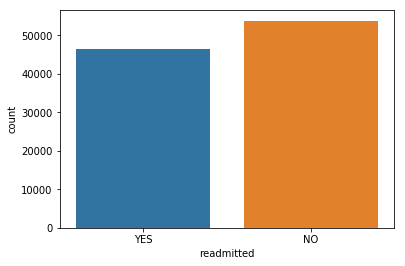

In [51]:
sns.countplot(df['readmitted'])

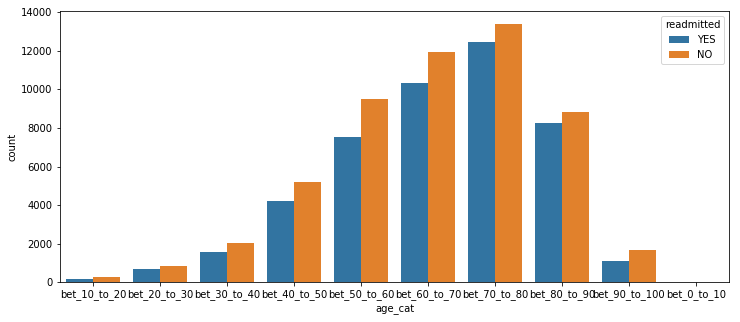

In [52]:
#plt.figure(figsize=(12, 5))
plt.figure(figsize=(12,5))
sns.countplot(x=df['age_cat'],hue=df['readmitted'])

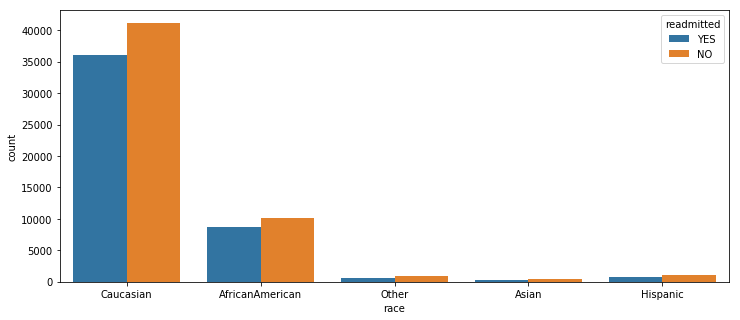

In [53]:

plt.figure(figsize=(12,5))
sns.countplot(x=df['race'],hue=df['readmitted'])

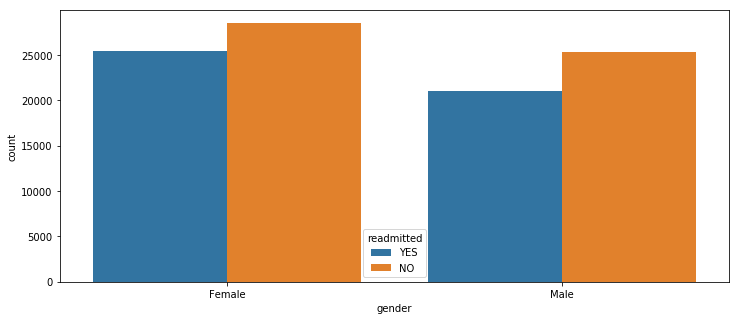

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['gender'],hue=df['readmitted'])

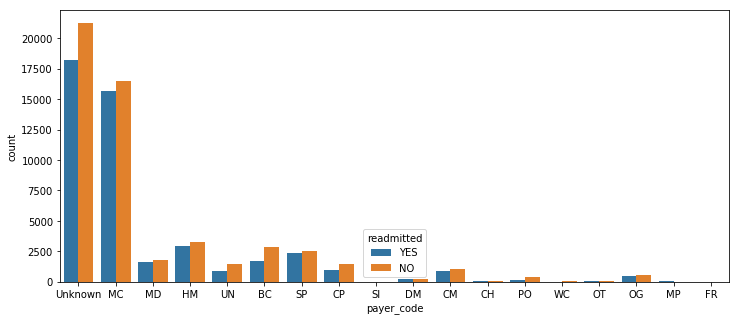

In [55]:
#payer_code
plt.figure(figsize=(12,5))
sns.countplot(x=df['payer_code'],hue=df['readmitted'])


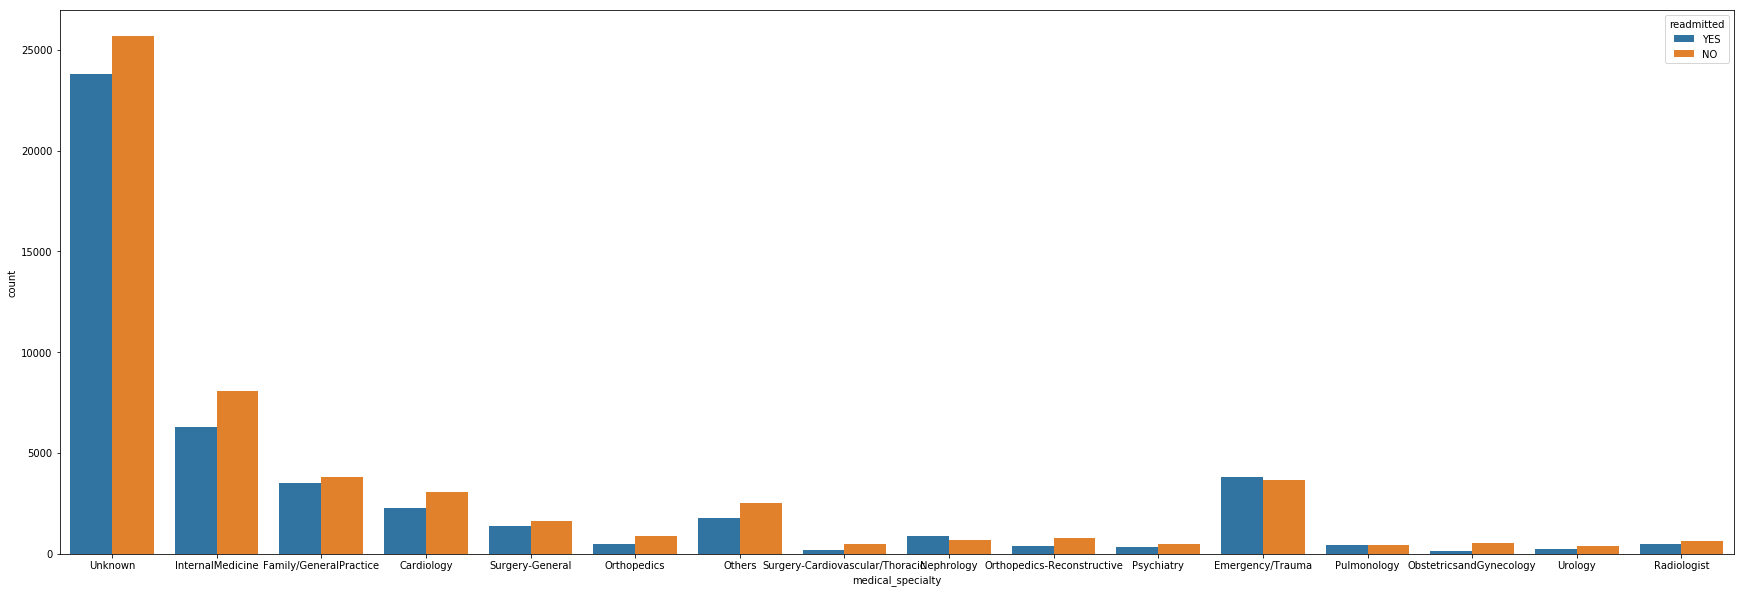

In [56]:
#payer_code
plt.figure(figsize=(30,10))
sns.countplot(x=df['medical_specialty'],hue=df['readmitted'])


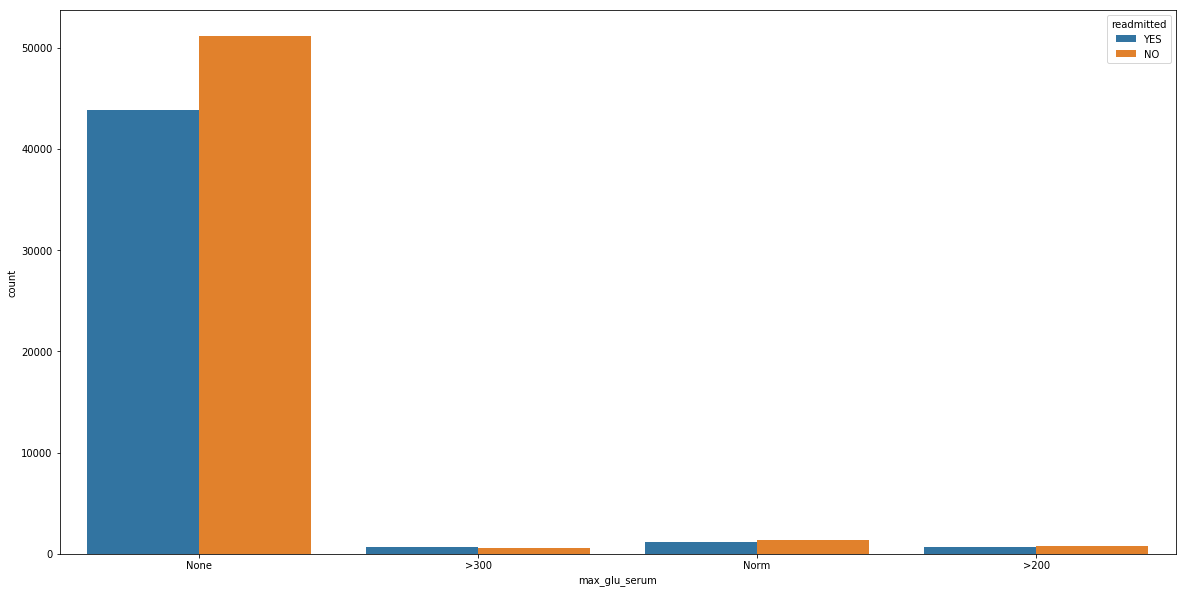

In [57]:
#max_glu_serum 
#payer_code
plt.figure(figsize=(20,10))
sns.countplot(x=df['max_glu_serum'],hue=df['readmitted'])


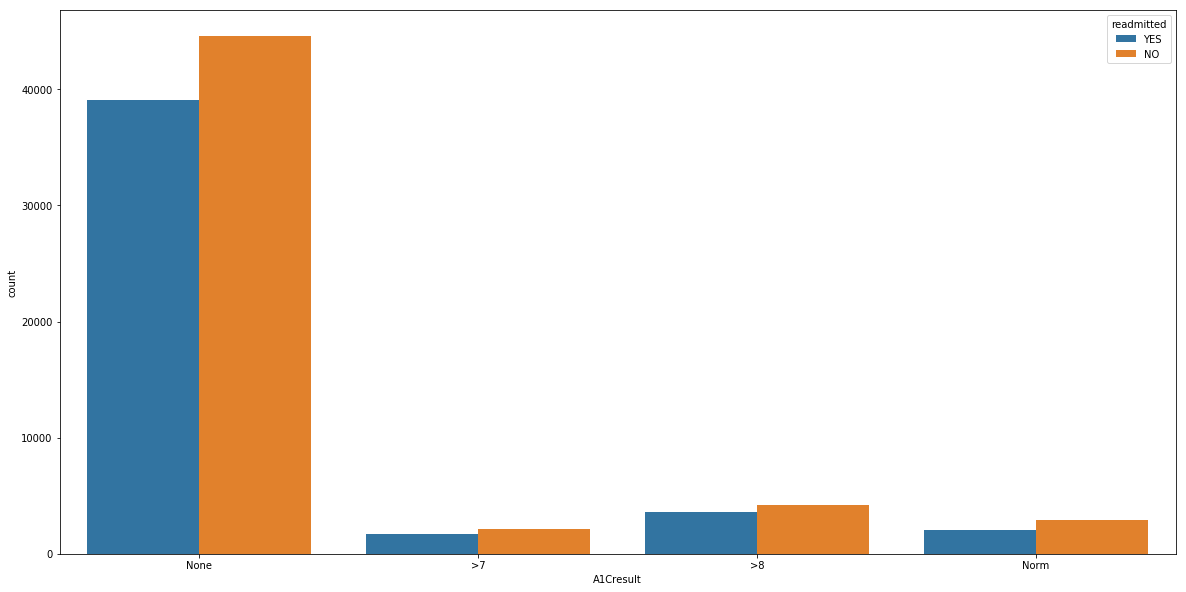

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['A1Cresult'],hue=df['readmitted'])


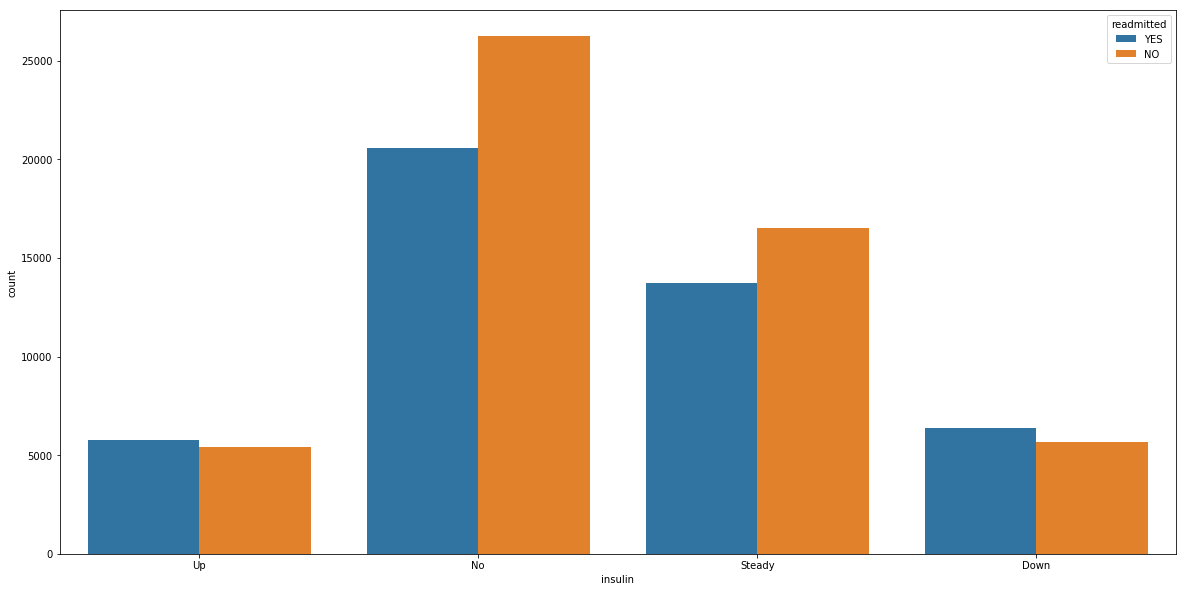

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['insulin'],hue=df['readmitted'])

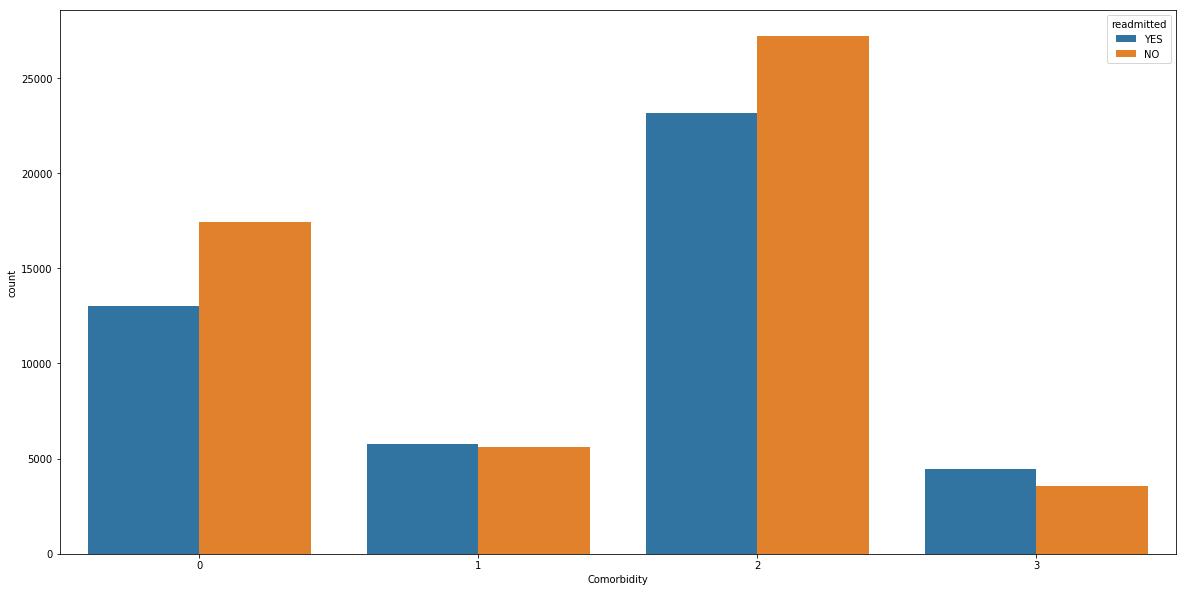

In [60]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Comorbidity'],hue=df['readmitted'])

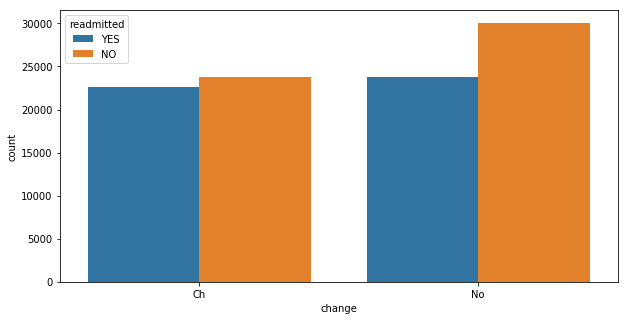

In [61]:
#change                      100241 non-null object
#diabetesMed
plt.figure(figsize=(10,5))
sns.countplot(x=df['change'],hue=df['readmitted'])


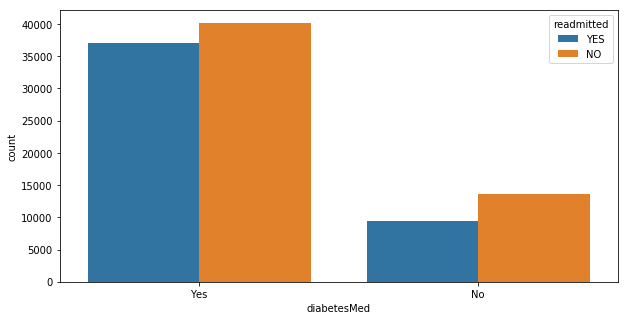

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['diabetesMed'],hue=df['readmitted'])


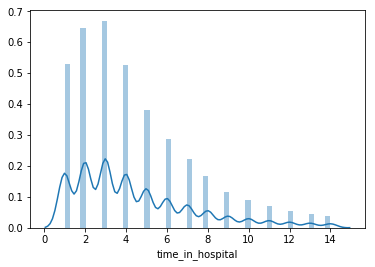

In [63]:
# simple density plot
sns.distplot(df['time_in_hospital'])
plt.show()

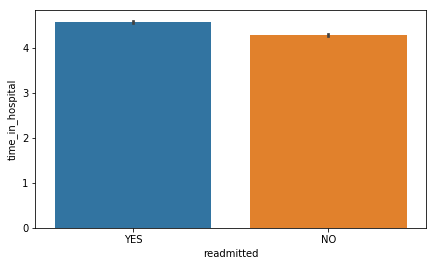

In [64]:
#plt.figure(figsize=(12, 5))
plt.figure(figsize=(7,4))
sns.barplot(x=df['readmitted'],y=df['time_in_hospital'])

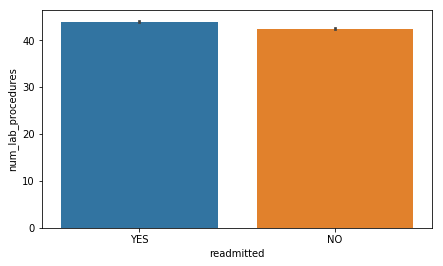

In [75]:
#plt.figure(figsize=(12, 5))
plt.figure(figsize=(7,4))
sns.barplot(x=df['readmitted'],y=df['num_lab_procedures'])

In [65]:
#num_procedures              100241 non-null int64
#num_medications             100241 non-null int64
#number_outpatient           100241 non-null int64
#number_emergency            100241 non-null int64
#number_inpatient            100241 non-null int64
#number_diagnoses

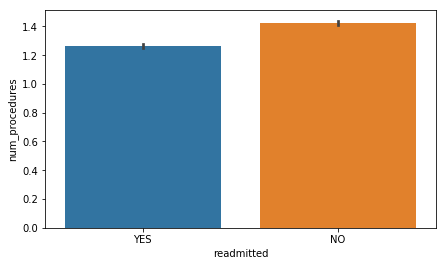

In [66]:
#plt.figure(figsize=(12, 5))
plt.figure(figsize=(7,4))
sns.barplot(x=df['readmitted'],y=df['num_procedures'])

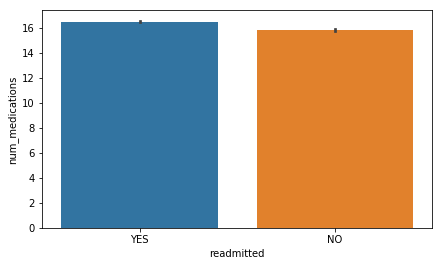

In [67]:
#plt.figure(figsize=(12, 5))
plt.figure(figsize=(7,4))
sns.barplot(x=df['readmitted'],y=df['num_medications'])

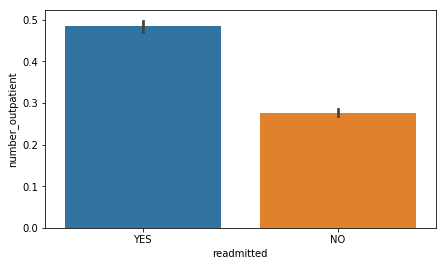

In [68]:
#plt.figure(figsize=(12, 5))
plt.figure(figsize=(7,4))
sns.barplot(x=df['readmitted'],y=df['number_outpatient'])

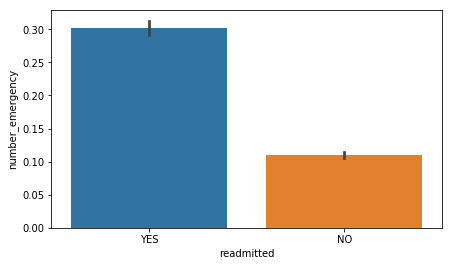

In [70]:
plt.figure(figsize=(7,4))
sns.barplot(x=df['readmitted'],y=df['number_emergency'])

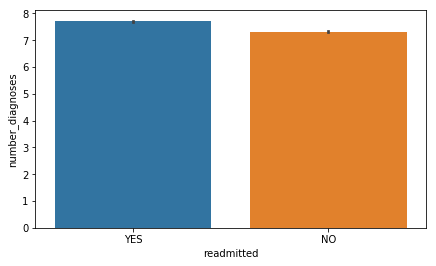

In [71]:
plt.figure(figsize=(7,4))
sns.barplot(x=df['readmitted'],y=df['number_diagnoses'])

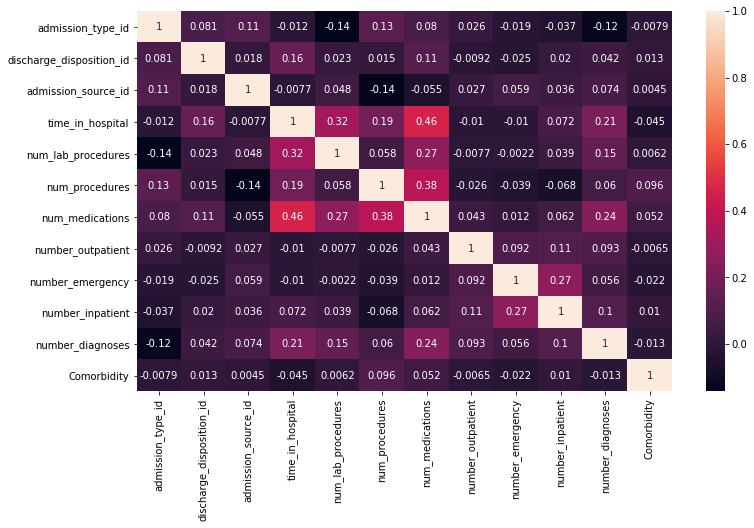

In [72]:

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.show()


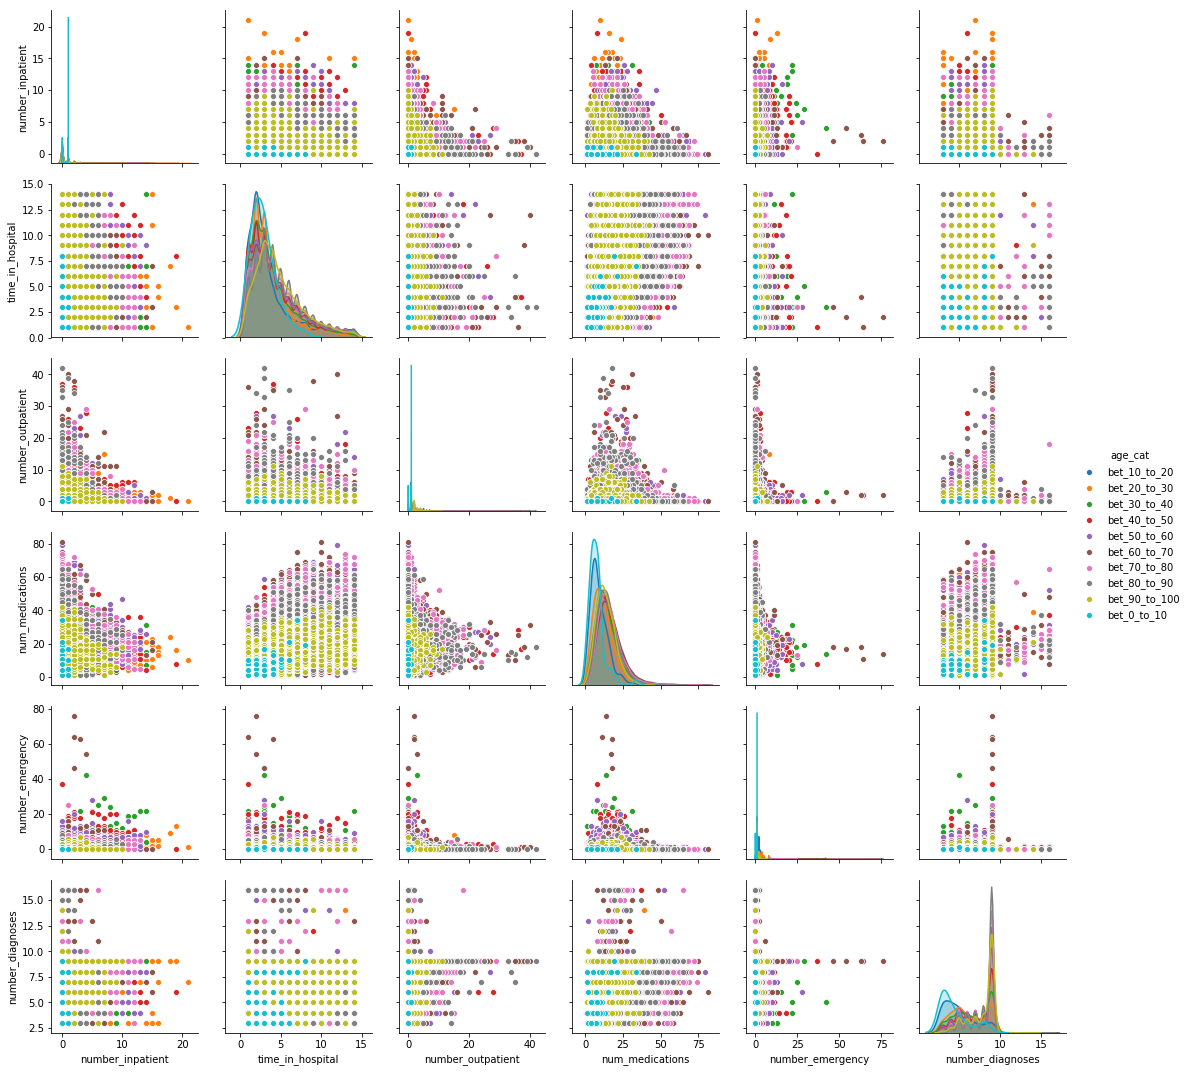

In [73]:
#pair  plot
sns.pairplot(df, hue='age_cat', vars=['number_inpatient','time_in_hospital','number_outpatient', 'num_medications', 'number_emergency', 'number_diagnoses'])
plt.show()


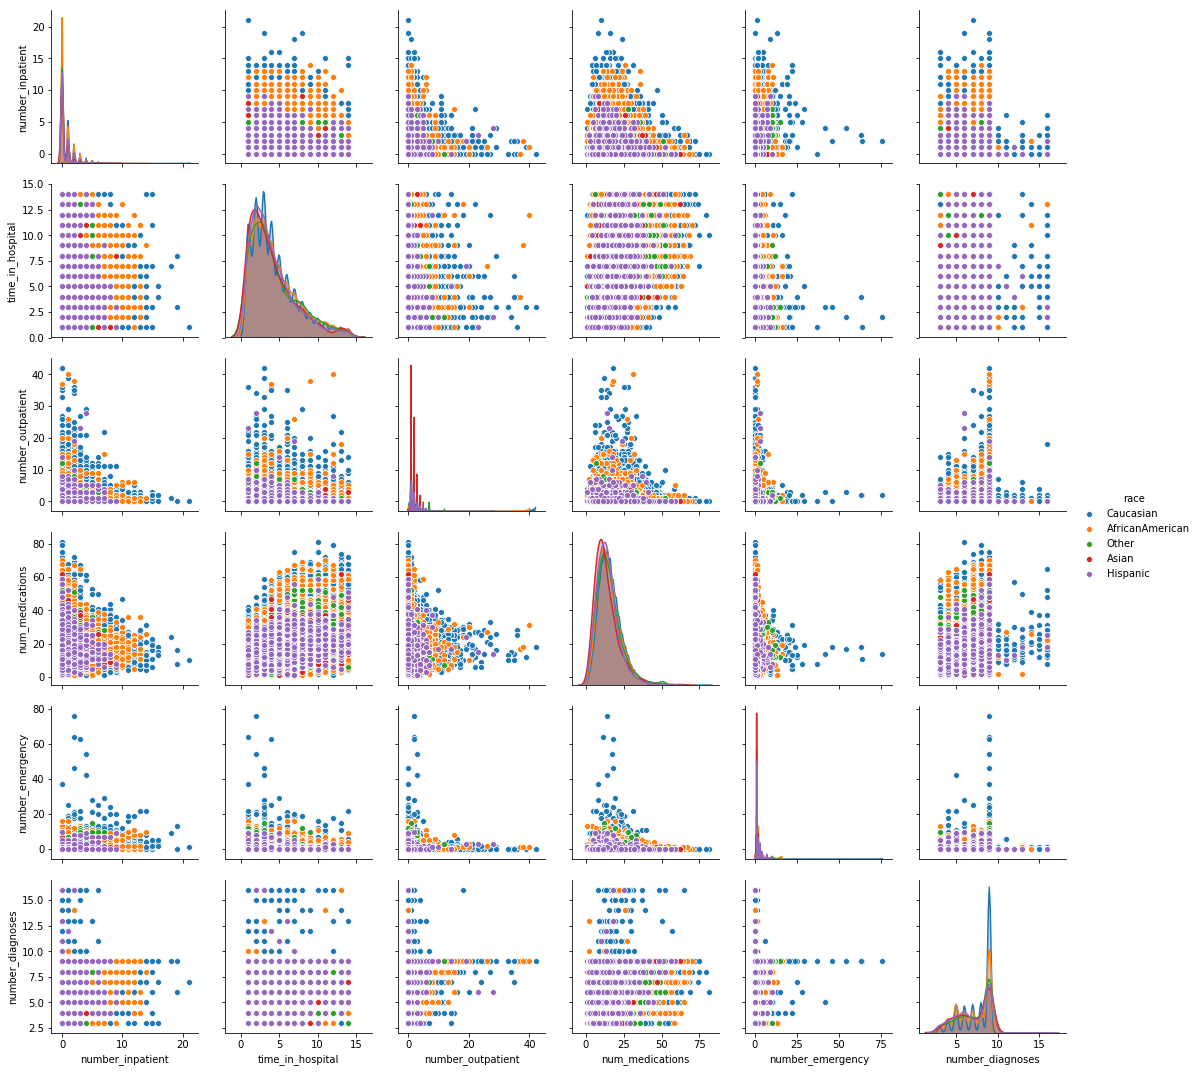

In [74]:
#pair  plot
sns.pairplot(df, hue='race', vars=['number_inpatient','time_in_hospital','number_outpatient', 'num_medications', 'number_emergency', 'number_diagnoses'])
plt.show()

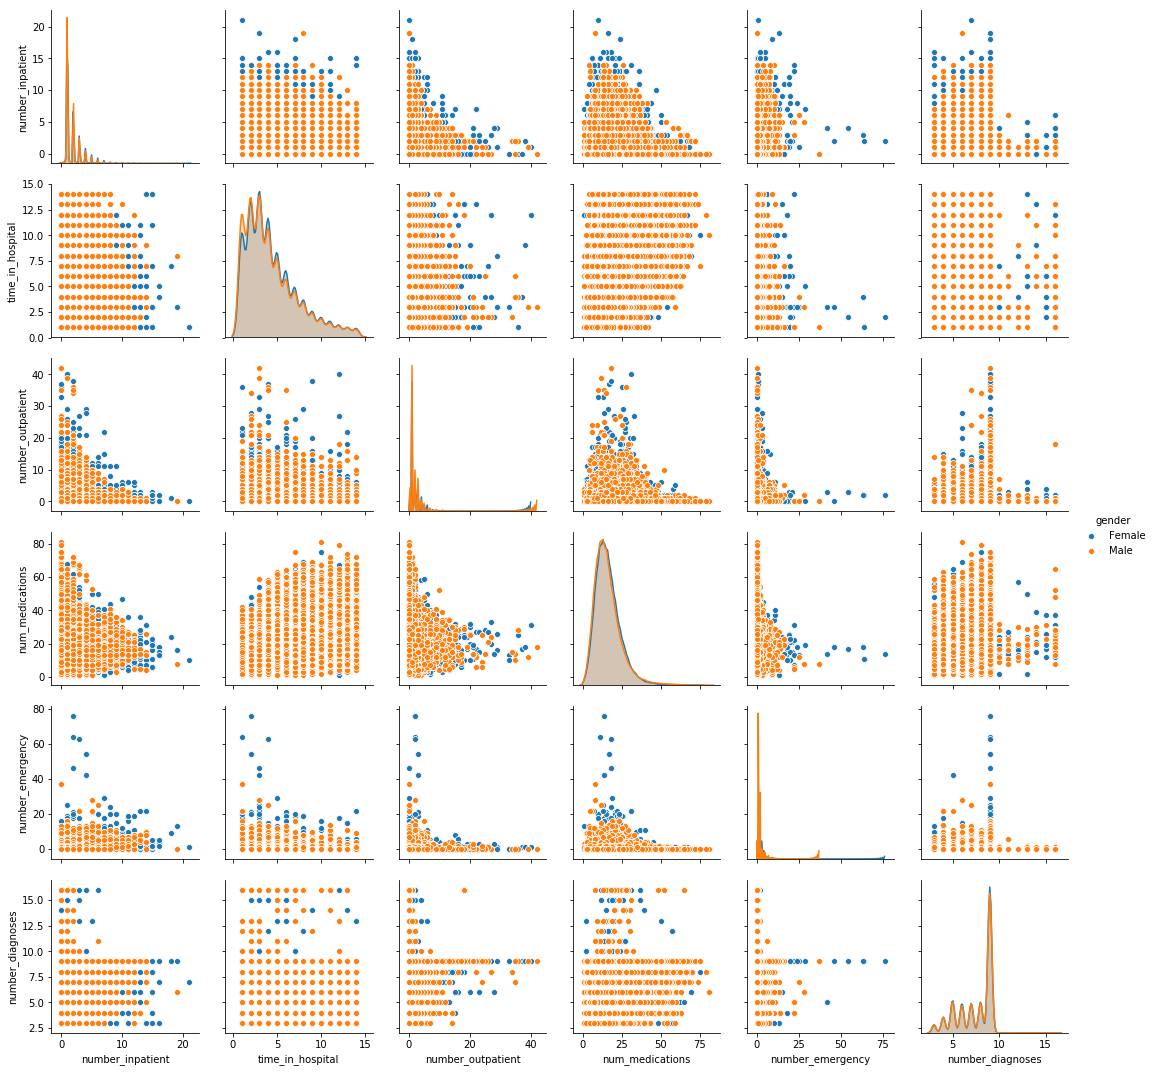

In [75]:
#pair  plot
sns.pairplot(df, hue='gender', vars=['number_inpatient','time_in_hospital','number_outpatient', 'num_medications', 'number_emergency', 'number_diagnoses'])
plt.show()


In [76]:
df['gender'] = df['gender'].apply({'Male':0, 'Female':1}.get)
df['gender'].head()

0    1
1    1
2    0
3    0
4    0
Name: gender, dtype: int64

In [77]:
df['diabetesMed'] = df['diabetesMed'].apply({'No':0, 'Yes':1}.get)
df['diabetesMed'].head()

0    1
1    1
2    1
3    1
4    1
Name: diabetesMed, dtype: int64

In [78]:
df['change'] = df['change'].apply({'No':0, 'Ch':1}.get)
df['change'].head()

0    1
1    0
2    1
3    1
4    0
Name: change, dtype: int64

In [79]:
df.readmitted=df.readmitted.replace(to_replace=['NO', 'YES'], value=[0, 1])

In [80]:
for col in df.columns:
    print("{}   {}".format(col, df[col].nunique()))

race   5
gender   2
admission_type_id   8
discharge_disposition_id   26
admission_source_id   17
time_in_hospital   14
payer_code   18
medical_specialty   16
num_lab_procedures   118
num_procedures   7
num_medications   75
number_outpatient   39
number_emergency   33
number_inpatient   20
number_diagnoses   14
max_glu_serum   4
A1Cresult   4
metformin   4
repaglinide   4
nateglinide   4
chlorpropamide   4
glimepiride   4
glipizide   4
glyburide   4
tolbutamide   2
pioglitazone   4
rosiglitazone   4
acarbose   4
miglitol   4
tolazamide   3
insulin   4
glyburide-metformin   4
glipizide_metformin   2
change   2
diabetesMed   2
readmitted   2
age_cat   10
Comorbidity   4


In [81]:
varlist =  ['tolbutamide', 'glipizide_metformin']
def binary_map(x):
    return x.map({'Steady': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [82]:
df_cat1 = df.select_dtypes(include=['object'])
df_cat1.head()

,race,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,age_cat
0,Caucasian,Unknown,Unknown,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,bet_10_to_20
1,AfricanAmerican,Unknown,Unknown,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,bet_20_to_30
2,Caucasian,Unknown,Unknown,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,bet_30_to_40
3,Caucasian,Unknown,Unknown,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,bet_40_to_50
4,Caucasian,Unknown,Unknown,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,bet_50_to_60


In [83]:
df_cat1.shape

(100241, 20)

In [84]:
cat_dummies = pd.get_dummies(df_cat1, drop_first=True)
cat_dummies.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,...,glyburide-metformin_Up,age_cat_bet_10_to_20,age_cat_bet_20_to_30,age_cat_bet_30_to_40,age_cat_bet_40_to_50,age_cat_bet_50_to_60,age_cat_bet_60_to_70,age_cat_bet_70_to_80,age_cat_bet_80_to_90,age_cat_bet_90_to_100
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [85]:
l1=list(df_cat1.columns)

In [86]:
df = df.drop(l1, axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 18 columns):
gender                      100241 non-null int64
admission_type_id           100241 non-null int64
discharge_disposition_id    100241 non-null int64
admission_source_id         100241 non-null int64
time_in_hospital            100241 non-null int64
num_lab_procedures          100241 non-null int64
num_procedures              100241 non-null int64
num_medications             100241 non-null int64
number_outpatient           100241 non-null int64
number_emergency            100241 non-null int64
number_inpatient            100241 non-null int64
number_diagnoses            100241 non-null int64
tolbutamide                 100241 non-null int64
glipizide_metformin         100241 non-null int64
change                      100241 non-null int64
diabetesMed                 100241 non-null int64
readmitted                  100241 non-null int64
Comorbidity                 100241 non-

In [88]:
df_no_cat = df.select_dtypes(include=['int64'])
df_no_cat.head()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,tolbutamide,glipizide_metformin,change,diabetesMed,readmitted,Comorbidity
0,1,1,1,7,3,59,0,18,0,0,0,9,0,0,1,1,1,1
1,1,1,1,7,2,11,5,13,2,0,1,6,0,0,0,1,0,0
2,0,1,1,7,2,44,1,16,0,0,0,7,0,0,1,1,0,3
3,0,1,1,7,1,51,0,8,0,0,0,5,0,0,1,1,0,0
4,0,2,1,2,3,31,6,16,0,0,0,9,0,0,0,1,1,2


In [89]:
l123=['gender', 'diabetesMed', 'tolbutamide','glipizide_metformin', 'readmitted']

In [90]:
df_no_cat = df_no_cat.drop(l123, axis=1)

In [91]:
nc_columns=list(df_no_cat.columns)

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
df_no_cat[nc_columns] = scaler.fit_transform(df_no_cat[nc_columns])

In [95]:
df_no_cat.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,Comorbidity
0,0.000000,0.0,0.250000,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.461538,1.0,0.333333
1,0.000000,0.0,0.250000,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.230769,0.0,0.000000
2,0.000000,0.0,0.250000,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.307692,1.0,1.000000
3,0.000000,0.0,0.250000,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.153846,1.0,0.000000
4,0.142857,0.0,0.041667,0.153846,0.229008,1.000000,0.1875,0.000000,0.0,0.000000,0.461538,0.0,0.666667


In [96]:
df = df.drop(nc_columns, axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 5 columns):
gender                 100241 non-null int64
tolbutamide            100241 non-null int64
glipizide_metformin    100241 non-null int64
diabetesMed            100241 non-null int64
readmitted             100241 non-null int64
dtypes: int64(5)
memory usage: 3.8 MB


In [98]:
final_df= pd.concat([df,df_no_cat,cat_dummies], axis=1)

In [99]:
final_df.head()

,gender,tolbutamide,glipizide_metformin,diabetesMed,readmitted,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin_Up,age_cat_bet_10_to_20,age_cat_bet_20_to_30,age_cat_bet_30_to_40,age_cat_bet_40_to_50,age_cat_bet_50_to_60,age_cat_bet_60_to_70,age_cat_bet_70_to_80,age_cat_bet_80_to_90,age_cat_bet_90_to_100
0,1,0,0,1,1,0.000000,0.0,0.250000,0.153846,0.442748,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0.000000,0.0,0.250000,0.076923,0.076336,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0.000000,0.0,0.250000,0.076923,0.328244,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0.000000,0.0,0.250000,0.000000,0.381679,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,1,0.142857,0.0,0.041667,0.153846,0.229008,...,0,0,0,0,0,1,0,0,0,0


In [100]:
final_df.readmitted.value_counts()

0    53818
1    46423
Name: readmitted, dtype: int64

In [101]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
y=final_df["readmitted"]
X=final_df.drop(['readmitted'],axis=1)

In [102]:
#Splitting data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size= 0.3, random_state = 100)


In [103]:
#random  forest
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

C:\Users\SNEHA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [104]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
# Making predictions
predictions = rfc.predict(X_test)

In [106]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [107]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.61      0.74      0.67     16183
          1       0.59      0.45      0.51     13890

avg / total       0.60      0.60      0.59     30073



In [108]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[11915  4268]
 [ 7661  6229]]


In [109]:
print(accuracy_score(y_test,predictions))

0.6033318923951717


In [110]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [111]:
# using rbf kernel, C=1, default value of gamma
#try  SVM
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.6135736374821268
precision 0.6496504418942092
recall 0.3545716342692585


In [113]:
#Running Your First Training Model
import statsmodels.api as sm

In [114]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70168
Model:                            GLM   Df Residuals:                    70058
Model Family:                Binomial   Df Model:                          109
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45398.
Date:                Mon, 04 Nov 2019   Deviance:                       90796.
Time:                        22:21:05   Pearson chi2:                 7.33e+04
No. Iterations:                    21   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -6.4837   7.86e+04  -8.25e-05      1.000   -1.54e+05    1.54e+05
gender                                                0.0759      0.016      4.688      0.000       0.044       0.108
tolbutamide                                          -0.2508      0.499     -0.503      0.615      -1.229       0.727
glipizide_metformin                                   0.9354      0.730      1.281      0.200      -0.496       2.367
diabetesMed                                           0.2580      0.029      8.811      0.000       0.201       0.315
admission_type_id                                     0.2633      0.045      5.801      0.000       0.174       0.352
discharge_disposition_id                             -0.4452      0.043    -10.345      0.000      -0.530      -0.361
admission_source_id                                  -0.0020      0.057     -0.036      0.971      -0.113       0.109
time_in_hospital                                      0.2243      0.042      5.331      0.000       0.142       0.307
num_lab_procedures                                    0.2598      0.062      4.222      0.000       0.139       0.380
num_procedures                                       -0.3483      0.032    -10.794      0.000      -0.412      -0.285
num_medications                                       0.1454      0.105      1.379      0.168      -0.061       0.352
number_outpatient                                     3.0071      0.302      9.955      0.000       2.415       3.599
number_emergency                                     19.4192      1.179     16.475      0.000      17.109      21.729
number_inpatient                                      7.4621      0.176     42.412      0.000       7.117       7.807
number_diagnoses                                      0.9272      0.063     14.696      0.000       0.804       1.051
change                                               -0.0624      0.030     -2.047      0.041      -0.122      -0.003
Comorbidity                                           0.3150      0.025     12.679      0.000       0.266       0.364
race_Asian                                           -0.3080      0.106     -2.917      0.004      -0.515      -0.101
race_Caucasian                                        0.0169      0.021      0.787      0.431      -0.025       0.059
race_Hispanic                                        -0.1733      0.061     -2.859      0.004      -0.292      -0.054
race_Other                                           -0.2921      0.070     -4.195      0.000      -0.429      -0.156
payer_code_CH                                        -0.1348      0.210     -0.640      0.522      -0.547       0.278
payer_code_CM                                         0.1936      0.070      2.778      0.005 

In [115]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train,y_train)   

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('gender', False, 73),
 ('tolbutamide', False, 47),
 ('glipizide_metformin', True, 1),
 ('diabetesMed', False, 30),
 ('admission_type_id', False, 41),
 ('discharge_disposition_id', False, 15),
 ('admission_source_id', False, 90),
 ('time_in_hospital', False, 44),
 ('num_lab_procedures', False, 22),
 ('num_procedures', False, 7),
 ('num_medications', False, 3),
 ('number_outpatient', True, 1),
 ('number_emergency', True, 1),
 ('number_inpatient', True, 1),
 ('number_diagnoses', True, 1),
 ('change', False, 80),
 ('Comorbidity', False, 10),
 ('race_Asian', False, 17),
 ('race_Caucasian', False, 94),
 ('race_Hispanic', False, 50),
 ('race_Other', False, 23),
 ('payer_code_CH', False, 48),
 ('payer_code_CM', False, 58),
 ('payer_code_CP', False, 74),
 ('payer_code_DM', False, 26),
 ('payer_code_FR', False, 5),
 ('payer_code_HM', False, 28),
 ('payer_code_MC', False, 27),
 ('payer_code_MD', False, 31),
 ('payer_code_MP', False, 9),
 ('payer_code_OG', False, 70),
 ('payer_code_OT', False, 5

In [117]:
col = X_train.columns[rfe.support_]

In [118]:
X_train.columns[~rfe.support_]

Index(['gender', 'tolbutamide', 'diabetesMed', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'change',
       'Comorbidity', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'payer_code_CH', 'payer_code_CM', 'payer_code_CP',
       'payer_code_DM', 'payer_code_FR', 'payer_code_HM', 'payer_code_MC',
       'payer_code_MD', 'payer_code_MP', 'payer_code_OG', 'payer_code_OT',
       'payer_code_PO', 'payer_code_SI', 'payer_code_SP', 'payer_code_UN',
       'payer_code_Unknown', 'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_InternalMedicine', 'medical_specialty_Nephrology',
       'medical_specialty_Orthopedics', 'medical_specialty_Others',
       'medical_specialty_Psychiatry', 'medical_specialty_Pulmonology',
       'medical_specialty_Radiologist', 'medical_specialty_Surgery-General'

In [119]:
X_train_sm=sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70168
Model:                            GLM   Df Residuals:                    70152
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46029.
Date:                Mon, 04 Nov 2019   Deviance:                       92059.
Time:                        22:24:52   Pearson chi2:                 7.33e+04
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.7744      1.149     -1.545      0.122      -4.026       0.477
glipizide_metformin                                   0.8971      0.721      1.244      0.214      -0.517       2.311
number_outpatient                                     3.1933      0.295     10.820      0.000       2.615       3.772
number_emergency                                     19.1921      1.160     16.543      0.000      16.918      21.466
number_inpatient                                      7.8169      0.174     45.045      0.000       7.477       8.157
number_diagnoses                                      1.0926      0.057     19.298      0.000       0.982       1.204
payer_code_WC                                        -0.8492      0.254     -3.347      0.001      -1.347      -0.352
medical_specialty_ObstetricsandGynecology            -1.0169      0.117     -8.723      0.000      -1.245      -0.788
medical_specialty_Orthopedics-Reconstructive         -0.4023      0.076     -5.284      0.000      -0.552      -0.253
medical_specialty_Surgery-Cardiovascular/Thoracic    -0.6457      0.108     -5.962      0.000      -0.858      -0.433
chlorpropamide_Up                                     1.4898      1.124      1.325      0.185      -0.714       3.693
acarbose_No                                          -0.4107      0.145     -2.837      0.005      -0.694      -0.127
acarbose_Up                                           1.7161      1.109      1.548      0.122      -0.457       3.889
miglitol_No                                          -0.5813      0.413     -1.408      0.159      -1.391       0.228
glyburide-metformin_No                                1.9606      1.062      1.847      0.065      -0.120       4.042
glyburide-metformin_Steady                            2.1582      1.066      2.025      0.043       0.069       4.247
=====================================================================================================================
"""

In [120]:
#predicted  values
# Getting the predicted values on the train set
y_train_pred = modres.predict(X_train_sm)
y_train_pred[:10]

69363    0.384705
31982    0.345762
68373    0.425184
67128    0.425184
22120    0.454764
62067    0.365013
22802    0.693210
46036    0.425184
39725    0.308782
58092    0.216966
dtype: float64

In [121]:
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmitted_Prob':y_train_pred})
y_train_pred_final['patientID'] = y_train.index
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID
69363,1,0.384705,69363
31982,1,0.345762,31982
68373,0,0.425184,68373
67128,0,0.425184,67128
22120,1,0.454764,22120


In [122]:
y_train_pred_final['Risk_bucket'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'high_risk' if x > 0.7 else ('med_risk'if 0.3<x<0.7 else 'low_risk'))

In [123]:
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID,Risk_bucket
69363,1,0.384705,69363,med_risk
31982,1,0.345762,31982,med_risk
68373,0,0.425184,68373,med_risk
67128,0,0.425184,67128,med_risk
22120,1,0.454764,22120,med_risk


In [124]:
from sklearn import metrics

In [125]:
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID,Risk_bucket,predicted
69363,1,0.384705,69363,med_risk,0
31982,1,0.345762,31982,med_risk,0
68373,0,0.425184,68373,med_risk,0
67128,0,0.425184,67128,med_risk,0
22120,1,0.454764,22120,med_risk,0


In [126]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final.predicted )
print(confusion)

[[30289  7346]
 [19721 12812]]


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.614254360962262


In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,glyburide-metformin_No,2108.29
12,miglitol_No,1974.00
10,acarbose_No,324.46
14,glyburide-metformin_Steady,15.34
4,number_diagnoses,7.17
3,number_inpatient,1.37
2,number_emergency,1.13
1,number_outpatient,1.11
11,acarbose_Up,1.03
7,medical_specialty_Orthopedics-Reconstructive,1.02


In [130]:
col = col.drop('glyburide-metformin_No', 1)
col

Index(['glipizide_metformin', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'payer_code_WC',
       'medical_specialty_ObstetricsandGynecology',
       'medical_specialty_Orthopedics-Reconstructive',
       'medical_specialty_Surgery-Cardiovascular/Thoracic',
       'chlorpropamide_Up', 'acarbose_No', 'acarbose_Up', 'miglitol_No',
       'glyburide-metformin_Steady'],
      dtype='object')

In [131]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
modres = logm3.fit()
modres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70168
Model:                            GLM   Df Residuals:                    70153
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46032.
Date:                Mon, 04 Nov 2019   Deviance:                       92064.
Time:                        22:25:54   Pearson chi2:                 7.33e+04
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                 0.1861      0.438      0.425      0.671      -0.672       1.045
glipizide_metformin                                   0.8973      0.721      1.244      0.213      -0.516       2.311
number_outpatient                                     3.1923      0.295     10.818      0.000       2.614       3.771
number_emergency                                     19.1945      1.160     16.546      0.000      16.921      21.468
number_inpatient                                      7.8158      0.174     45.043      0.000       7.476       8.156
number_diagnoses                                      1.0936      0.057     19.316      0.000       0.983       1.205
payer_code_WC                                        -0.8490      0.254     -3.346      0.001      -1.346      -0.352
medical_specialty_ObstetricsandGynecology            -1.0166      0.117     -8.721      0.000      -1.245      -0.788
medical_specialty_Orthopedics-Reconstructive         -0.4033      0.076     -5.298      0.000      -0.553      -0.254
medical_specialty_Surgery-Cardiovascular/Thoracic    -0.6455      0.108     -5.960      0.000      -0.858      -0.433
chlorpropamide_Up                                     1.4900      1.124      1.325      0.185      -0.713       3.693
acarbose_No                                          -0.4109      0.145     -2.838      0.005      -0.695      -0.127
acarbose_Up                                           1.7161      1.109      1.548      0.122      -0.457       3.889
miglitol_No                                          -0.5815      0.413     -1.408      0.159      -1.391       0.228
glyburide-metformin_Steady                            0.1978      0.094      2.097      0.036       0.013       0.383
=====================================================================================================================
"""

In [132]:
y_train_pred = modres.predict(X_train_sm).values.reshape(-1)

In [133]:
y_train_pred[:10]

array([0.38465681, 0.34568119, 0.42517142, 0.42517142, 0.45468112,
       0.36494772, 0.6931648 , 0.42517142, 0.30867375, 0.216945  ])

In [134]:
y_train_pred_final['Readmitted_Prob'] = y_train_pred

In [135]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID,Risk_bucket,predicted
69363,1,0.384657,69363,med_risk,0
31982,1,0.345681,31982,med_risk,0
68373,0,0.425171,68373,med_risk,0
67128,0,0.425171,67128,med_risk,0
22120,1,0.454681,22120,med_risk,0


In [136]:
y_train_pred_final['Risk_bucket'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'high_risk' if x > 0.7 else ('med_risk'if 0.3<x<0.7 else 'low_risk'))

In [137]:
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID,Risk_bucket,predicted
69363,1,0.384657,69363,med_risk,0
31982,1,0.345681,31982,med_risk,0
68373,0,0.425171,68373,med_risk,0
67128,0,0.425171,67128,med_risk,0
22120,1,0.454681,22120,med_risk,0


In [138]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.6142401094516019


In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,miglitol_No,304.00
10,acarbose_No,298.54
4,number_diagnoses,7.16
3,number_inpatient,1.37
2,number_emergency,1.13
1,number_outpatient,1.11
11,acarbose_Up,1.03
7,medical_specialty_Orthopedics-Reconstructive,1.02
6,medical_specialty_ObstetricsandGynecology,1.01
8,medical_specialty_Surgery-Cardiovascular/Thoracic,1.01


In [140]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop(['miglitol_No','acarbose_No'])
col

Index(['glipizide_metformin', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'payer_code_WC',
       'medical_specialty_ObstetricsandGynecology',
       'medical_specialty_Orthopedics-Reconstructive',
       'medical_specialty_Surgery-Cardiovascular/Thoracic',
       'chlorpropamide_Up', 'acarbose_Up', 'glyburide-metformin_Steady'],
      dtype='object')

In [141]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
modres = logm4.fit()
modres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                70168
Model:                            GLM   Df Residuals:                    70155
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46037.
Date:                Mon, 04 Nov 2019   Deviance:                       92074.
Time:                        22:26:41   Pearson chi2:                 7.33e+04
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.8052      0.021    -37.558      0.000      -0.847      -0.763
glipizide_metformin                                   0.8960      0.721      1.242      0.214      -0.518       2.310
number_outpatient                                     3.2051      0.295     10.856      0.000       2.626       3.784
number_emergency                                     19.1873      1.160     16.540      0.000      16.914      21.461
number_inpatient                                      7.8152      0.174     45.042      0.000       7.475       8.155
number_diagnoses                                      1.0944      0.057     19.331      0.000       0.983       1.205
payer_code_WC                                        -0.8504      0.254     -3.352      0.001      -1.348      -0.353
medical_specialty_ObstetricsandGynecology            -1.0164      0.117     -8.718      0.000      -1.245      -0.788
medical_specialty_Orthopedics-Reconstructive         -0.4031      0.076     -5.295      0.000      -0.552      -0.254
medical_specialty_Surgery-Cardiovascular/Thoracic    -0.6459      0.108     -5.964      0.000      -0.858      -0.434
chlorpropamide_Up                                     1.4887      1.124      1.324      0.185      -0.715       3.692
acarbose_Up                                           2.1257      1.099      1.934      0.053      -0.029       4.280
glyburide-metformin_Steady                            0.1973      0.094      2.092      0.036       0.012       0.382
=====================================================================================================================
"""

In [142]:
y_train_pred = modres.predict(X_train_sm).values.reshape(-1)

In [143]:
y_train_pred[:10]

array([0.38497175, 0.34595505, 0.42552589, 0.42552589, 0.4549898 ,
       0.36524222, 0.69345683, 0.42552589, 0.30890656, 0.21707633])

In [144]:
y_train_pred_final['Readmitted_Prob'] = y_train_pred

In [145]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Risk_bucket'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'high_risk' if x > 0.7 else ('med_risk'if 0.3<x<0.7 else 'low_risk'))

In [146]:
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID,Risk_bucket,predicted
69363,1,0.384972,69363,med_risk,0
31982,1,0.345955,31982,med_risk,0
68373,0,0.425526,68373,med_risk,0
67128,0,0.425526,67128,med_risk,0
22120,1,0.454990,22120,med_risk,0


In [147]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.6142258579409418


In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,number_inpatient,1.36
4,number_diagnoses,1.35
2,number_emergency,1.13
1,number_outpatient,1.11
7,medical_specialty_Orthopedics-Reconstructive,1.01
11,glyburide-metformin_Steady,1.01
0,glipizide_metformin,1.00
5,payer_code_WC,1.00
6,medical_specialty_ObstetricsandGynecology,1.00
8,medical_specialty_Surgery-Cardiovascular/Thoracic,1.00


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3938155104048197

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.8048093529958815

In [152]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1951906470041185


In [153]:
# positive predictive value 
print (TP / float(TP+FP))

0.6355789264808017


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6056588682263547


In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Readmitted, y_train_pred_final.Readmitted_Prob, drop_intermediate = False )

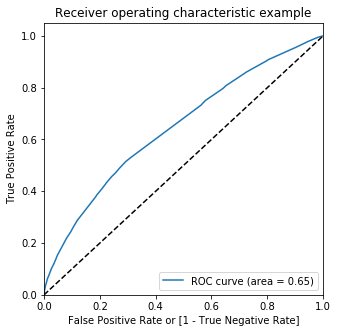

In [157]:
draw_roc(y_train_pred_final.Readmitted, y_train_pred_final.Readmitted_Prob)

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Readmitted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID,Risk_bucket,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
69363,1,0.384972,69363,med_risk,0,1,1,1,1,0,0,0,0,0,0
31982,1,0.345955,31982,med_risk,0,1,1,1,1,0,0,0,0,0,0
68373,0,0.425526,68373,med_risk,0,1,1,1,1,1,0,0,0,0,0
67128,0,0.425526,67128,med_risk,0,1,1,1,1,1,0,0,0,0,0
22120,1,0.454990,22120,med_risk,0,1,1,1,1,1,0,0,0,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.463644  1.000000  0.000000
0.1   0.1  0.463644  1.000000  0.000000
0.2   0.2  0.466751  0.998033  0.007493
0.3   0.3  0.473278  0.990840  0.025880
0.4   0.4  0.561524  0.804875  0.351162
0.5   0.5  0.614226  0.392094  0.806244
0.6   0.6  0.592507  0.208158  0.924751
0.7   0.7  0.568735  0.099622  0.974253
0.8   0.8  0.555267  0.051886  0.990408
0.9   0.9  0.544907  0.021394  0.997449


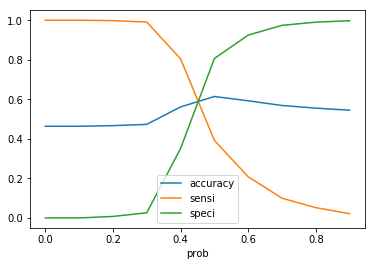

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Readmitted_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patientID,Risk_bucket,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
69363,1,0.384972,69363,med_risk,0,1,1,1,1,0,0,0,0,0,0,0
31982,1,0.345955,31982,med_risk,0,1,1,1,1,0,0,0,0,0,0,0
68373,0,0.425526,68373,med_risk,0,1,1,1,1,1,0,0,0,0,0,0
67128,0,0.425526,67128,med_risk,0,1,1,1,1,1,0,0,0,0,0,0
22120,1,0.454990,22120,med_risk,0,1,1,1,1,1,0,0,0,0,0,1


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.final_predicted)

0.6183587960323794

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final.final_predicted )
confusion2

array([[27521, 10114],
       [16665, 15868]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4877508990870808

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.7312607944732297

In [167]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2687392055267703


In [168]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6107305057347394


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))


0.6228443398361472


In [170]:
confusion = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final.predicted )
confusion

array([[30343,  7292],
       [19777, 12756]], dtype=int64)

In [171]:
#precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6362729449321628

In [172]:
#recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.3920941812928411

In [173]:
from sklearn.metrics import precision_score, recall_score

In [174]:
from sklearn.metrics import precision_recall_curve

In [175]:
y_train_pred_final.Readmitted, y_train_pred_final.predicted

(69363    1
 31982    1
 68373    0
 67128    0
 22120    1
 62067    1
 22802    1
 46036    1
 39725    0
 58092    0
 39517    0
 97426    0
 62264    1
 86711    0
 99913    0
 68371    0
 63371    0
 69059    1
 4707     1
 732      0
 69249    0
 21140    1
 43145    0
 85992    1
 37334    1
 5543     0
 4561     1
 29784    1
 17531    0
 40221    0
         ..
 21377    1
 27039    0
 30596    1
 83820    1
 71323    1
 84354    1
 6230     0
 80989    1
 38537    1
 42491    1
 7738     1
 17724    0
 59243    1
 91791    0
 86296    1
 78833    0
 49954    0
 71182    1
 13890    0
 20533    0
 75618    1
 14260    0
 82270    1
 63370    0
 81840    0
 65615    0
 77655    1
 79683    1
 56088    1
 38408    0
 Name: Readmitted, Length: 70168, dtype: int64, 69363    0
 31982    0
 68373    0
 67128    0
 22120    0
 62067    0
 22802    1
 46036    0
 39725    0
 58092    0
 39517    0
 97426    0
 62264    0
 86711    1
 99913    0
 68371    1
 63371    0
 69059    1
 4707

In [176]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Readmitted, y_train_pred_final.Readmitted_Prob)

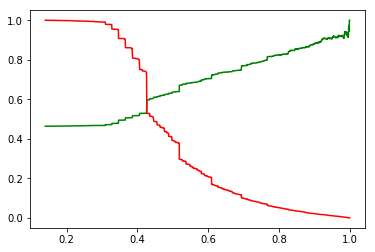

In [177]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [178]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30073 entries, 52838 to 25448
Columns: 109 entries, gender to age_cat_bet_90_to_100
dtypes: float64(13), int64(4), uint8(92)
memory usage: 6.8 MB


In [179]:
X_test = X_test[col]
X_test.head()

,glipizide_metformin,number_outpatient,number_emergency,number_inpatient,number_diagnoses,payer_code_WC,medical_specialty_ObstetricsandGynecology,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Surgery-Cardiovascular/Thoracic,chlorpropamide_Up,acarbose_Up,glyburide-metformin_Steady
52838,0,0.00000,0.000000,0.142857,0.461538,0,0,0,0,0,0,0
99578,0,0.00000,0.000000,0.000000,0.153846,0,0,0,0,0,0,0
112,0,0.00000,0.000000,0.000000,0.384615,0,0,0,0,0,0,0
5449,0,0.00000,0.000000,0.000000,0.307692,0,0,0,0,0,0,0
84605,0,0.02381,0.013158,0.000000,0.461538,0,0,0,0,0,0,0


In [180]:
X_test_sm = sm.add_constant(X_test)

In [181]:
y_test_pred = modres.predict(X_test_sm)

In [182]:
y_test_pred[:10]

52838    0.693457
99578    0.345955
112      0.405087
5449     0.384972
84605    0.507161
59729    0.766470
97459    0.609254
93452    0.425526
58084    0.517998
27677    0.345955
dtype: float64

In [183]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [184]:
# Let's see the head
y_pred_1.head()

,0
52838,0.693457
99578,0.345955
112,0.405087
5449,0.384972
84605,0.507161


In [185]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [186]:
# Putting CustID to index
y_test_df['PatientID'] = y_test_df.index

In [187]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [188]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [189]:
y_pred_final.head()

,readmitted,PatientID,0
0,1,52838,0.693457
1,0,99578,0.345955
2,1,112,0.405087
3,1,5449,0.384972
4,0,84605,0.507161


In [190]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Readmitted_Prob'})

In [191]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['PatientID','readmitted','Readmitted_Prob'], axis=1)

In [192]:
# Let's see the head of y_pred_final
y_pred_final.head()

,PatientID,readmitted,Readmitted_Prob
0,52838,1,0.693457
1,99578,0,0.345955
2,112,1,0.405087
3,5449,1,0.384972
4,84605,0,0.507161


In [193]:
y_pred_final['final_predicted'] = y_pred_final.Readmitted_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [194]:
y_pred_final.head()

,PatientID,readmitted,Readmitted_Prob,final_predicted
0,52838,1,0.693457,1
1,99578,0,0.345955,0
2,112,1,0.405087,0
3,5449,1,0.384972,0
4,84605,0,0.507161,1


In [195]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.readmitted, y_pred_final.final_predicted)

0.6209224221062082

In [196]:
confusion2 = metrics.confusion_matrix(y_pred_final.readmitted, y_pred_final.final_predicted )
confusion2

array([[11872,  4311],
       [ 7089,  6801]], dtype=int64)

In [197]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4896328293736501

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.7336093431378607

In [200]:
print(col)

Index(['glipizide_metformin', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'payer_code_WC',
       'medical_specialty_ObstetricsandGynecology',
       'medical_specialty_Orthopedics-Reconstructive',
       'medical_specialty_Surgery-Cardiovascular/Thoracic',
       'chlorpropamide_Up', 'acarbose_Up', 'glyburide-metformin_Steady'],
      dtype='object')


In [201]:
y_pred_final.head()

,PatientID,readmitted,Readmitted_Prob,final_predicted
0,52838,1,0.693457,1
1,99578,0,0.345955,0
2,112,1,0.405087,0
3,5449,1,0.384972,0
4,84605,0,0.507161,1


In [202]:
y_pred_final['Risk_bucket'] = y_pred_final.Readmitted_Prob.map(lambda x: 'high_risk' if x > 0.7 else ('med_risk'if 0.3<x<0.7 else 'low_risk'))

In [203]:
y_pred_final.head()

,PatientID,readmitted,Readmitted_Prob,final_predicted,Risk_bucket
0,52838,1,0.693457,1,med_risk
1,99578,0,0.345955,0,med_risk
2,112,1,0.405087,0,med_risk
3,5449,1,0.384972,0,med_risk
4,84605,0,0.507161,1,med_risk


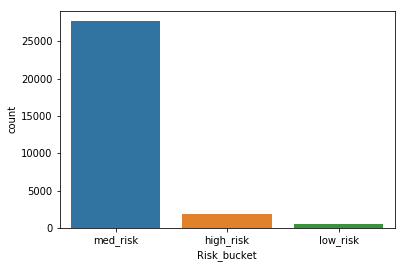

In [204]:
sns.countplot(y_pred_final['Risk_bucket'])